In [45]:
%matplotlib inline

In [46]:
import numpy as np
import scipy.sparse as sp
from pyamg.gallery import poisson, diffusion_stencil_2d, stencil_grid
from pyamg.relaxation.relaxation import jacobi
save = 1

In [47]:
grid = (10,10)
#A = poisson(grid)
sten = diffusion_stencil_2d(epsilon=0.001, theta=3.0*np.pi/4, type='FE')
A = stencil_grid(sten, grid)

(100, 100)

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation

def update_plot(frame_num, surf, x_true, b, x):
    if frame_num > 0:
        jacobi(A, x, b)
        
    error = np.abs(x_true - x)
    E = np.reshape(error, grid)
        
    surf[0].remove()
    surf[0] = ax.plot_surface(X, Y, E, cmap=cm.coolwarm)
    ax.set_zlim(0, 0.8)
    
    return surf

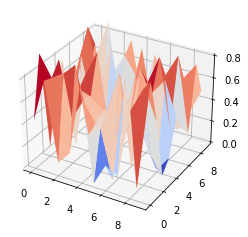

In [49]:
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(projection='3d')
    
X = np.arange(0, grid[0])
Y = np.arange(0, grid[1])
X, Y = np.meshgrid(X, Y)

x_true = np.ones(A.shape[0],)
b = A.dot(x_true)
x = np.random.rand(A.shape[0],)
error = np.abs(x_true - x)
E = np.reshape(error, grid) 
surf = [ax.plot_surface(X, Y, E, cmap=cm.coolwarm)]
anim = FuncAnimation(fig, update_plot, 15, fargs=(surf, x_true, b, x), interval=1000)

In [50]:
if save:
    anim.save('jacobi_diffuse.mp4', writer='ffmpeg', fps=1, dpi=100)

In [51]:
HTML(anim.to_html5_video())